In [129]:
import pandas as pd
print("Total rows in file:", len(pd.read_csv("../data/AAPL_iv_merged.csv")))

df = pd.read_csv("../data/AAPL_iv_merged.csv")
print("After loading:", len(df))

df = df.dropna(subset=["implied_vol", "strike", "T", "type"])
print("After dropna:", len(df))

df = df[(df["implied_vol"] > 0.01) & (df["implied_vol"] < 3.0)]
print("After IV filter:", len(df))

df = df[(df["T"] > 0.001) & (df["T"] < 1.0)]
print("After T filter:", len(df))
print(df["type"].unique())



df[["strike", "T", "type", "implied_vol"]].head()


Total rows in file: 359
After loading: 359
After dropna: 359
After IV filter: 359
After T filter: 359
[0 1]


,strike,T,type,implied_vol
0,145.0,0.013699,0,2.862058
1,150.0,0.013699,0,2.279978
2,160.0,0.013699,0,2.165082
3,165.0,0.013699,0,1.359902
4,170.0,0.013699,0,1.290116


In [130]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


In [131]:
X = df[["strike", "T", "type"]].values
y = df["implied_vol"].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))  # Reshape y to 2D

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


ValueError: Expected 2D array, got 1D array instead:
array=[2.86205763 2.27997825 2.16508173 1.35990173 1.29011568 0.97011936
 0.86550794 0.40100452 0.46987214 0.45549491 0.47861199 0.39774483
 0.38708328 0.37922115 0.36944175 0.36278711 0.3597964  0.362079
 0.36366579 0.3739227  0.39263473 0.40358437 0.42549969 0.43771461
 0.45675978 0.48113807 0.48428294 0.51690138 0.52458998 0.51734067
 0.57331913 0.62761345 0.68035541 0.73165591 0.86923186 0.8303012
 0.87780238 0.92417915 0.96949041 1.01378957 1.12411242 1.09954232
 1.22167671 1.26080051 1.29918338 1.7170779  1.4860505  1.3772773
 1.27246976 1.17128295 1.07340416 0.97854683 0.8864449  0.85264457
 0.79418635 0.72429214 0.64751692 0.59967932 0.52951837 0.47742157
 0.45102882 0.43227545 0.41633378 0.40424128 0.38773635 0.37888192
 0.37565022 0.35953702 0.37355427 0.38031548 0.39089678 0.42461114
 0.47145021 2.97727993 1.69730624 2.67454369 2.43529345 1.89802402
 0.48873353 0.71059164 0.76375871 0.43282014 0.37895182 0.39951449
 0.34548108 0.35370691 0.32996797 0.32427075 0.3227075  0.31736412
 0.31054606 0.30840222 0.30308397 0.30268958 0.30400432 0.31248923
 0.31853547 0.3286056  0.33862923 0.35145785 0.35915887 0.36484369
 0.38271286 0.39188016 0.40561693 0.41240646 0.43173569 0.46770613
 0.47065252 0.53668639 0.53434966 0.56502115 0.59496611 0.66445486
 0.65282537 0.68080571 0.70819258 0.73501254 0.76129017 0.78704828
 0.81230808 0.83708936 0.86141064 0.9632541  0.95442787 0.99858219
 1.04130545 1.0826884  1.18745779 1.45233759 1.36023137 1.27278461
 1.18951552 1.11000923 1.03390543 0.96088858 0.89068018 0.82303231
 0.80802358 0.77243352 0.72776572 0.66074452 0.6250587  0.56989234
 0.52150075 0.49156757 0.45441645 0.41750235 0.39466306 0.38097413
 0.373492   0.36391836 0.35205326 0.34585916 0.34305793 0.33532242
 0.33108805 0.33262659 0.33185832 0.33968424 0.34695474 0.32187544
 0.34677119 0.41045055 0.51214711 1.70399476 1.61740108 1.8296632
 2.35876781 2.89494667 2.43139421 1.63469469 1.52875325 1.42209169
 0.72391087 1.22518794 1.14352874 0.56514268 0.66410009 0.58012793
 0.52331852 0.37084123 0.33580481 0.31630813 0.31358367 0.29604636
 0.28671837 0.2893294  0.29035711 0.30036754 0.31863195 0.3336932
 0.34869045 0.36792952 0.37839305 0.39892325 0.39811238 0.42515898
 0.42338016 0.53579718 0.50225616 0.52673304 0.55065208 0.57404081
 0.5969244  0.68384423 0.88344935 0.81427974 0.7861042  0.74956045
 0.69117913 0.63467249 0.59479082 0.56291348 0.52501091 0.48331018
 0.44863797 0.43095662 0.40242764 0.38291797 0.35935368 0.34654091
 0.33338585 0.32083236 0.31313959 0.28339526 0.28924114 0.26071391
 0.50296702 1.21635763 1.00214608 1.33198279 0.54472517 0.53638143
 0.43085856 0.33839319 0.34134364 0.29632452 0.28644378 0.27746192
 0.27337966 0.27387542 0.27967811 0.28984355 0.30106208 0.31708754
 0.33136875 0.34176927 0.34867354 0.37439145 0.37758872 0.40087161
 0.43658782 0.45925601 0.46730661 0.46960061 0.50905186 0.47900316
 0.4972325  0.56661085 0.80434251 0.6972702  0.69369004 0.64202752
 0.59212542 0.55762056 0.54774926 0.51189564 0.47372778 0.45376028
 0.41868231 0.40565991 0.37862324 0.36083311 0.3448242  0.33176613
 0.31936392 0.30733825 0.30314831 0.30086868 0.30563723 0.32832802
 0.28845906 0.28290957 0.37663683 0.4151909  2.86205763 2.27997825
 2.16508173 1.35990173 1.29011568 0.97011936 0.86550794 0.40100452
 0.46987214 0.45549491 0.47861199 0.39774483 0.38708328 0.37922115
 0.36944175 0.36278711 0.3597964  0.362079   0.36366579 0.3739227
 0.39263473 0.40358437 0.42549969 0.43771461 0.45675978 0.48113807
 0.48428294 0.51690138 0.52458998 0.51734067 0.57331913 0.62761345
 0.68035541 0.73165591 0.86923186 0.8303012  0.87780238 0.92417915
 0.96949041 1.01378957 1.12411242 1.09954232 1.22167671 1.26080051
 1.29918338 1.7170779  1.4860505  1.3772773  1.27246976 1.17128295
 1.07340416 0.97854683 0.8864449  0.85264457 0.79418635 0.72429214
 0.64751692 0.59967932 0.52951837 0.47742157 0.45102882 0.43227545
 0.41633378 0.40424128 0.38773635 0.37888192 0.37565022 0.35953702
 0.37355427 0.38031548 0.39089678 0.42461114 0.47145021].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Training samples: 287
Test samples: 72


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(3,32)
        self.fc2=nn.Linear(32,16)
        self.fc3=nn.Linear(16,1)

    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        return self.fc3(x);

In [ ]:
model=Net()
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.MSELoss()


In [ ]:
epochs=500

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs=model(X_train)
    loss=criterion(outputs,y_train)

    loss.backward()
    optimizer.step()

    if(epoch+1)%50==0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

Epoch 50/500, Loss: 0.411153
Epoch 100/500, Loss: 0.251364
Epoch 150/500, Loss: 0.248935
Epoch 200/500, Loss: 0.247130
Epoch 250/500, Loss: 0.245177
Epoch 300/500, Loss: 0.243128
Epoch 350/500, Loss: 0.241029
Epoch 400/500, Loss: 0.238917
Epoch 450/500, Loss: 0.236821
Epoch 500/500, Loss: 0.234767


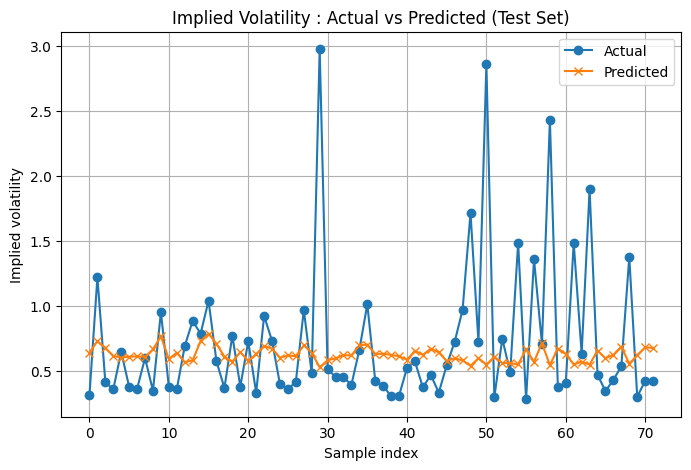

In [ ]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze().numpy()
    actual = y_test.squeeze().numpy()

plt.figure(figsize=(8,5))
plt.plot(actual,label="Actual",marker='o')
plt.plot(predictions,label="Predicted",marker='x')
plt.title("Implied Volatility : Actual vs Predicted (Test Set)")
plt.xlabel("Sample index")
plt.ylabel("Implied volatility")
plt.legend()
plt.grid(True)
plt.show()